<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# Clustering

## 1. Load data

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.target_names.shape

(10,)

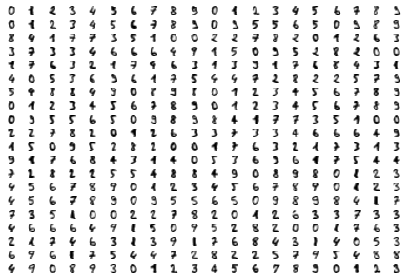

In [7]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [8]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42)

In [9]:
embedding = reducer.transform(digits.data)

embedding

array([[16.415064 ,  5.403095 ],
       [-6.8859315, 10.380437 ],
       [ 6.4986944,  7.716394 ],
       ...,
       [-4.2610126,  9.804346 ],
       [-0.8258133,  5.3570886],
       [-3.8006005,  9.585036 ]], dtype=float32)

## 2. Clustering Methods

### 2.1 K-Means

https://scikit-learn.org/stable/modules/clustering.html#k-means

#### 2.1.1 Clustering raw data

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(digits.data)

kmeans

KMeans(n_clusters=10, random_state=42)

In [11]:
kmeans.predict(digits.data)

array([0, 5, 5, ..., 5, 1, 1], dtype=int32)

In [12]:
kmeans.cluster_centers_[0]

array([ 0.00000000e+00,  2.23463687e-02,  4.22905028e+00,  1.31396648e+01,
        1.12681564e+01,  2.93854749e+00,  3.35195531e-02, -8.32667268e-17,
        1.73472348e-18,  8.82681564e-01,  1.26201117e+01,  1.33687151e+01,
        1.14078212e+01,  1.13687151e+01,  9.60893855e-01,  0.00000000e+00,
        8.67361738e-19,  3.72625698e+00,  1.42122905e+01,  5.25139665e+00,
        2.10614525e+00,  1.21173184e+01,  3.53072626e+00, -1.38777878e-17,
       -4.33680869e-19,  5.29608939e+00,  1.26424581e+01,  2.03351955e+00,
        2.29050279e-01,  9.07821229e+00,  6.47486034e+00, -8.67361738e-19,
        0.00000000e+00,  5.88268156e+00,  1.14916201e+01,  8.65921788e-01,
        3.35195531e-02,  8.81005587e+00,  7.15083799e+00,  0.00000000e+00,
       -3.46944695e-18,  3.51396648e+00,  1.32849162e+01,  1.65921788e+00,
        1.49162011e+00,  1.13519553e+01,  5.84357542e+00,  6.93889390e-18,
        8.67361738e-19,  8.04469274e-01,  1.31117318e+01,  9.96089385e+00,
        1.03519553e+01,  

#### 2.1.2 Clustering UMAP embedding

In [13]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(embedding)

kmeans

KMeans(n_clusters=10, random_state=42)

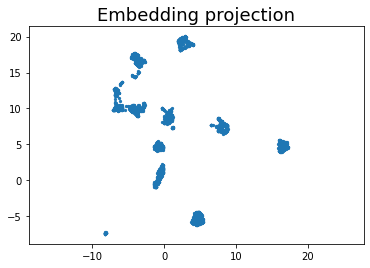

In [14]:
import numpy as np

plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Embedding projection', fontsize=18);

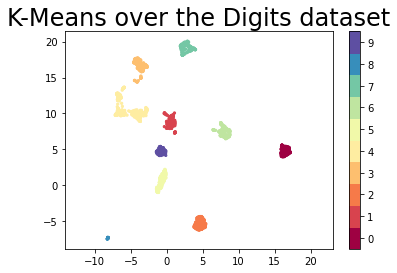

In [15]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters + 1) - 0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=24);

### 2.2 DBSCAN

https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [16]:
from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=1.5,
                  min_samples=25).fit(embedding)

dbscan_c

DBSCAN(eps=1.5, min_samples=25)

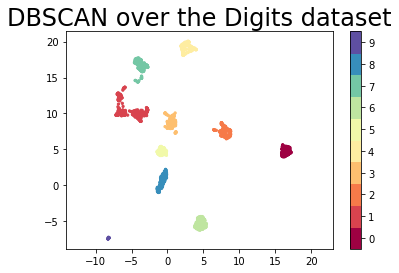

In [17]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

### 2.3 HDBSCAN

Current version (2021-03) is not properly installing the library with pip nor conda. To make it work correctly you should install it from source:

```
wget https://github.com/scikit-learn-contrib/hdbscan/archive/master.zip
unzip master.zip
rm master.zip
cd hdbscan-master

pip install -r requirements.txt

python setup.py install
```

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

In [18]:
import hdbscan

hdbscan_c = hdbscan.HDBSCAN()

hdbscan_c.fit(embedding)

hdbscan_c

HDBSCAN()

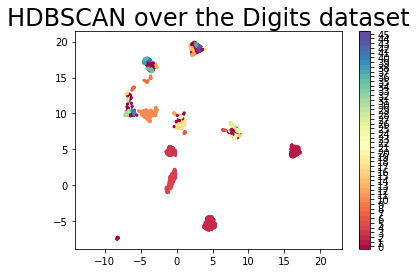

In [19]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(hdbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(hdbscan_c.labels_))))
plt.title('HDBSCAN over the Digits dataset', fontsize=24);

### 2.4 Which is the best method?

There is no definitive answer for this question. Each clustering algorithm could perform better or worse depending on the data and its hyperparameters.

In the digits dataset projection case, it seems that K-Means is the best choice as clustering algorithm. Nevertheless, the following actions are proposed:

- Fine tune hyperparameters of DBSCAN and HDBSCAN
- Repeat this analysis with the Moons dataset using these 3 algorithms


## 3. Evaluation metrics

### 3.1 Silhoutte score

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [20]:
from sklearn import metrics

print(f'K-Means: {metrics.silhouette_score(embedding, kmeans.labels_, metric="euclidean")}')
print(f'DBSCAN: {metrics.silhouette_score(embedding, dbscan_c.labels_, metric="euclidean")}')
print(f'HDBSCAN: {metrics.silhouette_score(embedding, hdbscan_c.labels_, metric="euclidean")}')

K-Means: 0.7747927308082581
DBSCAN: 0.7747927308082581
HDBSCAN: 0.5363436937332153


### 3.2 Adjusted Rand Score

https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score

In [21]:
print(f'K-Means: {metrics.adjusted_rand_score(digits.target, kmeans.labels_)}')
print(f'DBSCAN: {metrics.adjusted_rand_score(digits.target, dbscan_c.labels_)}')
print(f'HDBSCAN: {metrics.adjusted_rand_score(digits.target, hdbscan_c.labels_)}')

K-Means: 0.8359898002894226
DBSCAN: 0.8359898002894226
HDBSCAN: 0.6417792334926512


### 3.3 Elbow curve

```
pip install yellowbrick
```

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

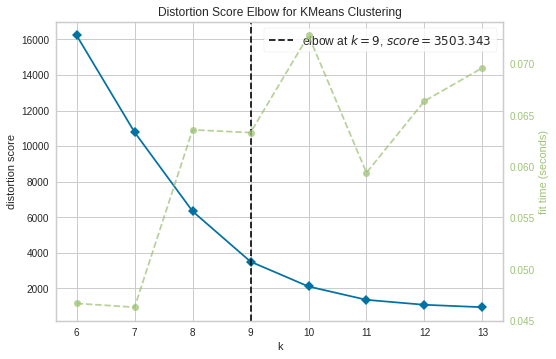

In [22]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(6,14))

visualizer.fit(embedding)
visualizer.show();

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>